In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

# Input Data

In [37]:
df = pd.read_pickle('model.pkl')
total = df[(df['Event']=='SBD')&\
          (df['Total'].notnull())&(df['Total']>0)].reset_index(drop = True)[['Sex','Age','Tested','Total','BodyweightKg']].copy()

dead = df[(df['Dead'].notnull())&\
         (df['Dead']>0)].reset_index(drop = True)[['Sex','Age','Tested','Dead','BodyweightKg']].copy()

bench = df[(df['Bench'].notnull())&\
          (df['Bench']>0)].reset_index(drop = True)[['Sex','Age','Tested','Bench','BodyweightKg']].copy()

squat = df[(df['Squat'].notnull())&\
          (df['Squat']>0)].reset_index(drop = True)[['Sex','Age','Tested','Squat','BodyweightKg']].copy()

# Generalized Model

Feature Engineering

Dummy Variable
- Drug Tested
- Sex

In [38]:
total_g = pd.get_dummies(total,columns = ['Tested','Sex'], drop_first = True)
squat_g = pd.get_dummies(squat,columns = ['Tested','Sex'], drop_first = True)
bench_g = pd.get_dummies(bench,columns = ['Tested','Sex'], drop_first = True)
dead_g = pd.get_dummies(dead,columns = ['Tested','Sex'], drop_first = True)

# Predicting Total Weight Lifted

Linear Regression Model

In [39]:
def lr_model(total):
    # Shape of data set
    print(str(len(total))+' rows.\n'+str(len(total.columns))+' columns.')
    print(str(len(total.columns)-1)+' features.')

    # Plotting the distribution of the target variable
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 1, 1)
    col = total.columns[1]
    total[col].plot(kind='hist', bins=10, edgecolor='black')
    plt.xlabel('Weight')
    plt.title('Distribution of ' + col)

    # Preprocessing
    X = total.drop([col], axis=1)
    y = total[col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Regression modeling
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    # Predictions
    plm = lm.predict(X_test)

    # Plotting Actual vs. Predicted values
    plt.subplot(2, 1, 2)
    plt.scatter(y_test, plm)
    plt.plot(y_test, y_test, "r")
    plt.xlabel('Actual ' + col)
    plt.ylabel('Predicted ' + col)

    # Display the linear regression formula with coefficients
    coef_string = ' + '.join([f'{coef:.2f} * {feature}' for coef, feature in zip(lm.coef_, X.columns)])
    equation = f'Y = {lm.intercept_:.2f} + {coef_string}'
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Evaluate the model
    print("MSE:", metrics.mean_squared_error(y_test, plm))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, plm)))
    print("RRMSE:", np.sqrt(metrics.mean_squared_error(y_test, plm)) / y_test.mean())
    print("MAE:", metrics.mean_absolute_error(y_test, plm))
    print("RMAE:", metrics.mean_absolute_error(y_test, plm) / y_test.mean())
    print("EV:", metrics.explained_variance_score(y_test, plm))
    print("R2:", metrics.r2_score(y_test, plm))

    plt.tight_layout()

448587 rows.
5 columns.
4 features.
MSE: 8589.433037417775
RMSE: 92.67919419922562
RRMSE: 0.1990199494274128
MAE: 71.16727843571577
RMAE: 0.15282511115403186
EV: 0.6449636615906569
R2: 0.6449601406875904


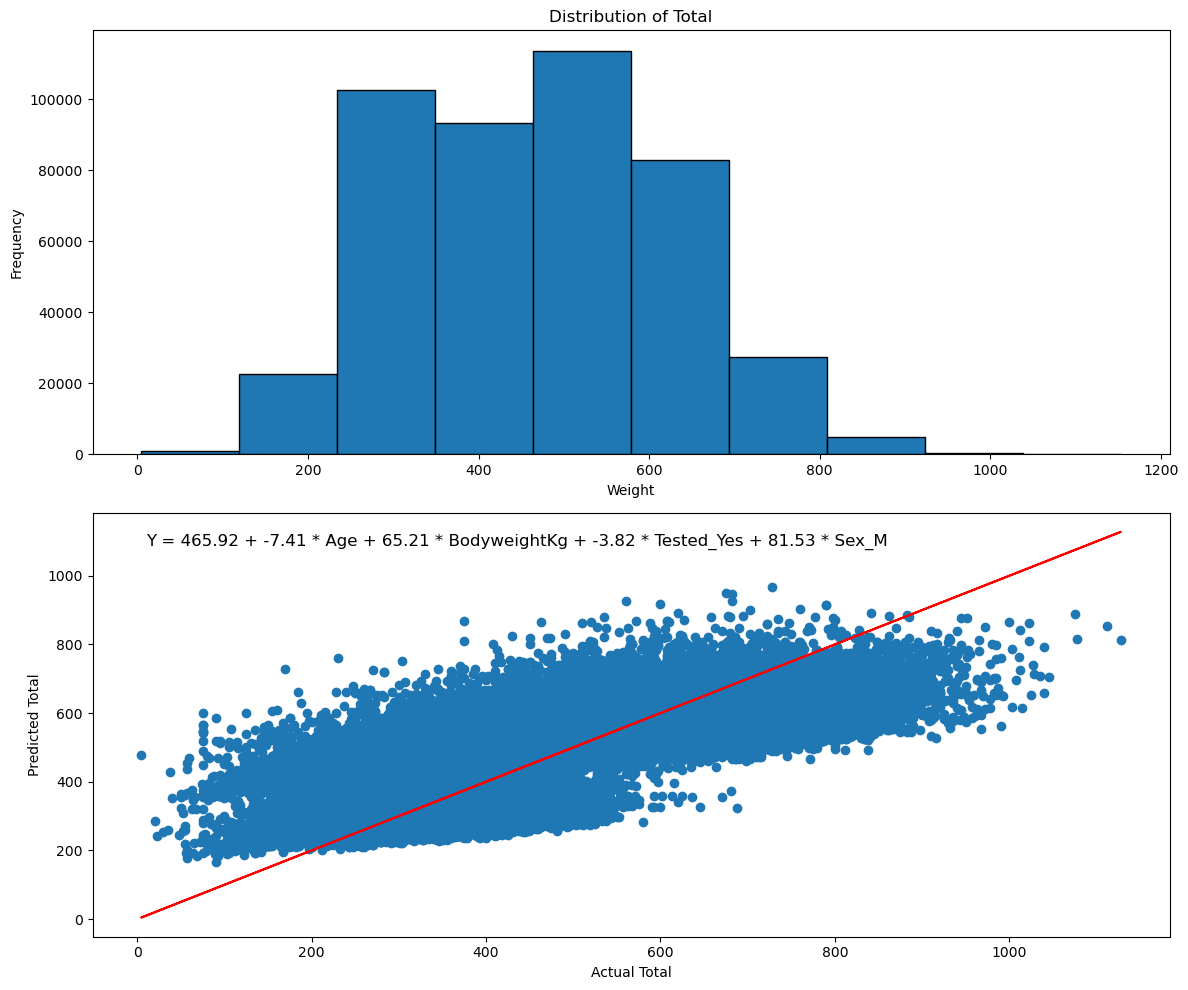

In [40]:
lr_model(total_g)

461271 rows.
5 columns.
4 features.
MSE: 1383.9337004596443
RMSE: 37.201259393461996
RRMSE: 0.22367419020536722
MAE: 28.4575893181936
RMAE: 0.17110249356403592
EV: 0.5913609736184307
R2: 0.5913609359957732


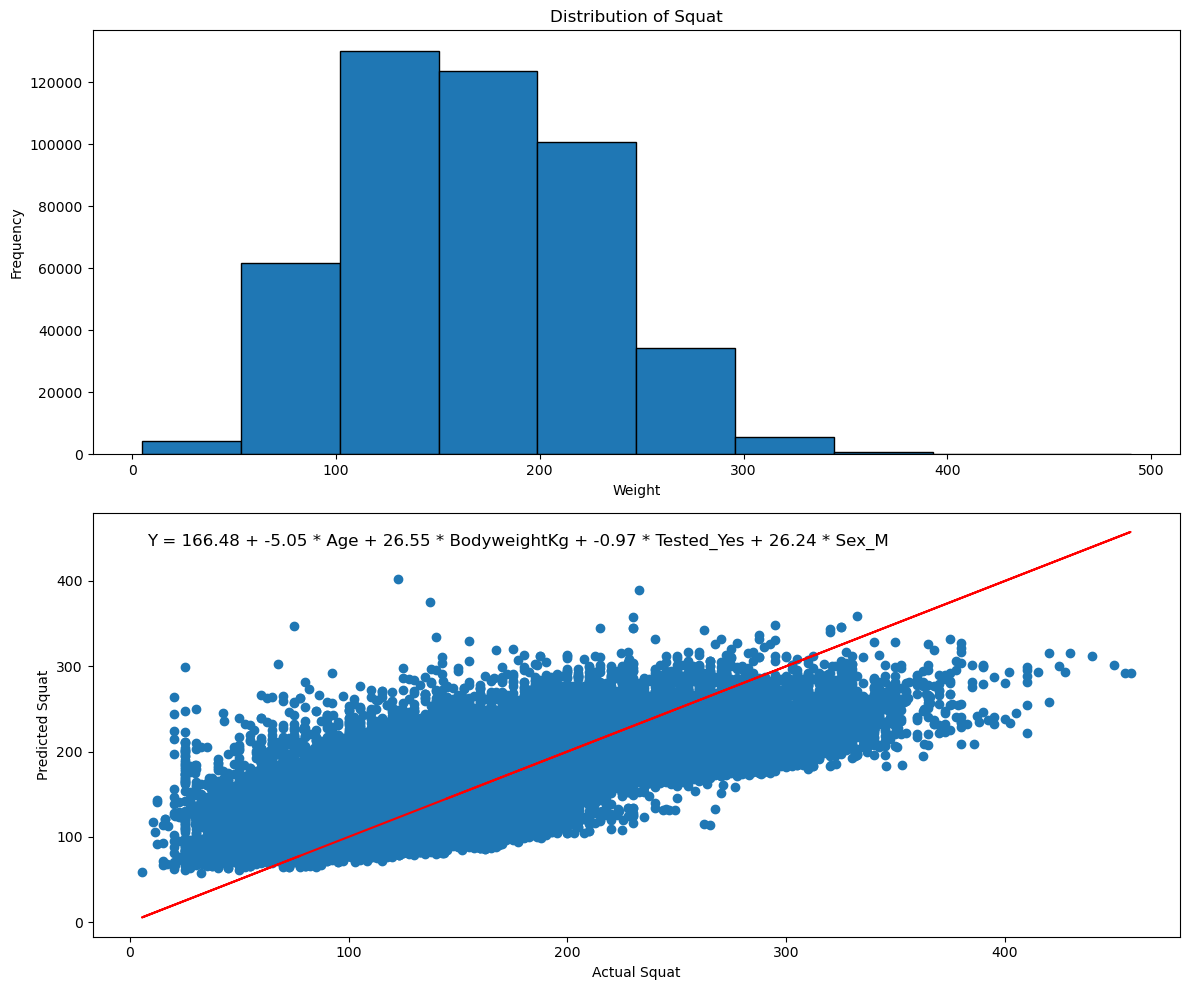

In [41]:
lr_model(squat_g)

626758 rows.
5 columns.
4 features.
MSE: 735.4970832721352
RMSE: 27.120049470311354
RRMSE: 0.2423882496065988
MAE: 20.810396123468045
RMAE: 0.18599506964429804
EV: 0.6483378076755799
R2: 0.6483370402810639


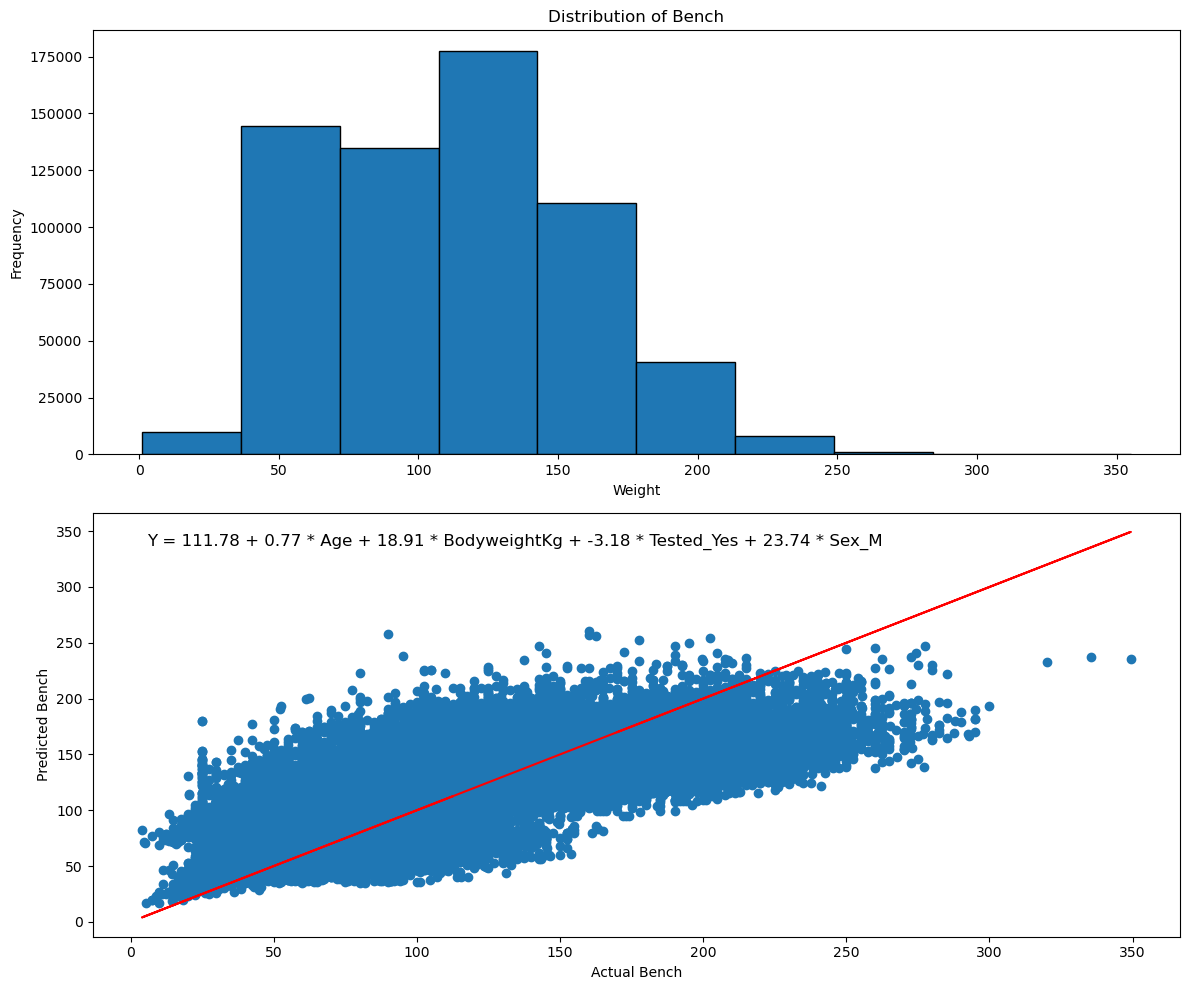

In [42]:
lr_model(bench_g)

541704 rows.
5 columns.
4 features.
MSE: 1508.6829934211898
RMSE: 38.84176867009521
RRMSE: 0.20120869076405812
MAE: 29.758460373606287
RMAE: 0.15415520600475136
EV: 0.5856613489557487
R2: 0.5856601628207723


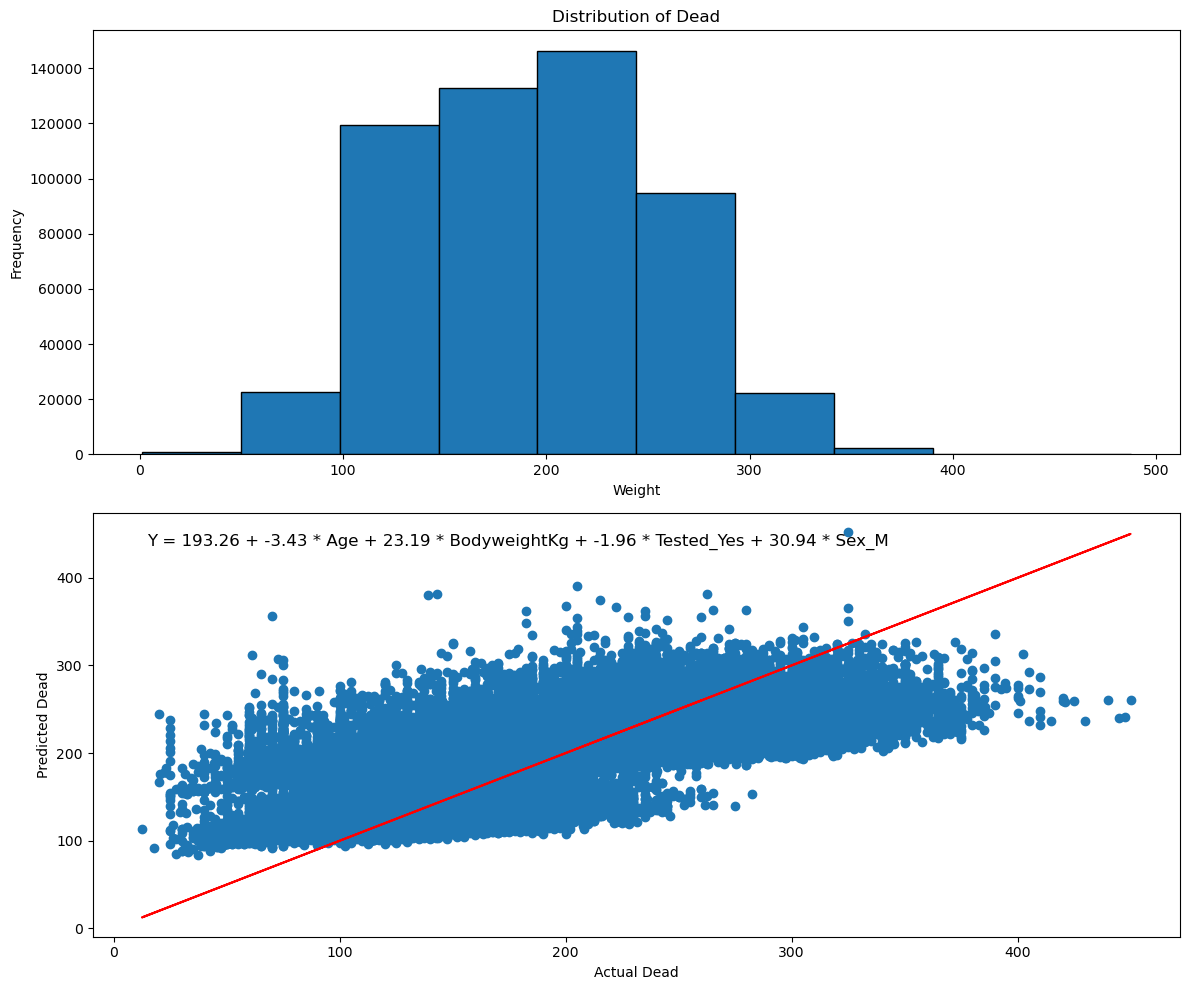

In [43]:
lr_model(dead_g)

Random Forest

In [50]:
def rf_model(total):
    # Shape of data set
    print(str(len(total))+' rows.\n'+str(len(total.columns))+' columns.')
    print(str(len(total.columns)-1)+' features.')

    # Plotting the distribution of the target variable
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 1, 1)
    col = total.columns[1]
    total[col].plot(kind='hist', bins=10, edgecolor='black')
    plt.xlabel('Weight')
    plt.title('Distribution of ' + col)

    # Preprocessing
    X = total.drop([col], axis=1)
    y = total[col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Regression modeling
    lm = RandomForestRegressor(n_estimators = 250, random_state = 0)
    lm.fit(X_train, y_train)

    # Predictions
    plm = lm.predict(X_test)

    # Plotting Actual vs. Predicted values
    plt.subplot(2, 1, 2)
    plt.scatter(y_test, plm)
    plt.plot(y_test, y_test, "r")
    plt.xlabel('Actual ' + col)
    plt.ylabel('Predicted ' + col)

    # Evaluate the model
    print("MSE:", metrics.mean_squared_error(y_test, plm))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, plm)))
    print("RRMSE:", np.sqrt(metrics.mean_squared_error(y_test, plm)) / y_test.mean())
    print("MAE:", metrics.mean_absolute_error(y_test, plm))
    print("RMAE:", metrics.mean_absolute_error(y_test, plm) / y_test.mean())
    print("EV:", metrics.explained_variance_score(y_test, plm))
    print("R2:", metrics.r2_score(y_test, plm))

    plt.tight_layout()

448587 rows.
5 columns.
4 features.
MSE: 7003.354951572989
RMSE: 83.68604992215243
RRMSE: 0.17970800854703464
MAE: 63.50311352582671
RMAE: 0.13636702985597263
EV: 0.7105200925967476
R2: 0.7105198741419092


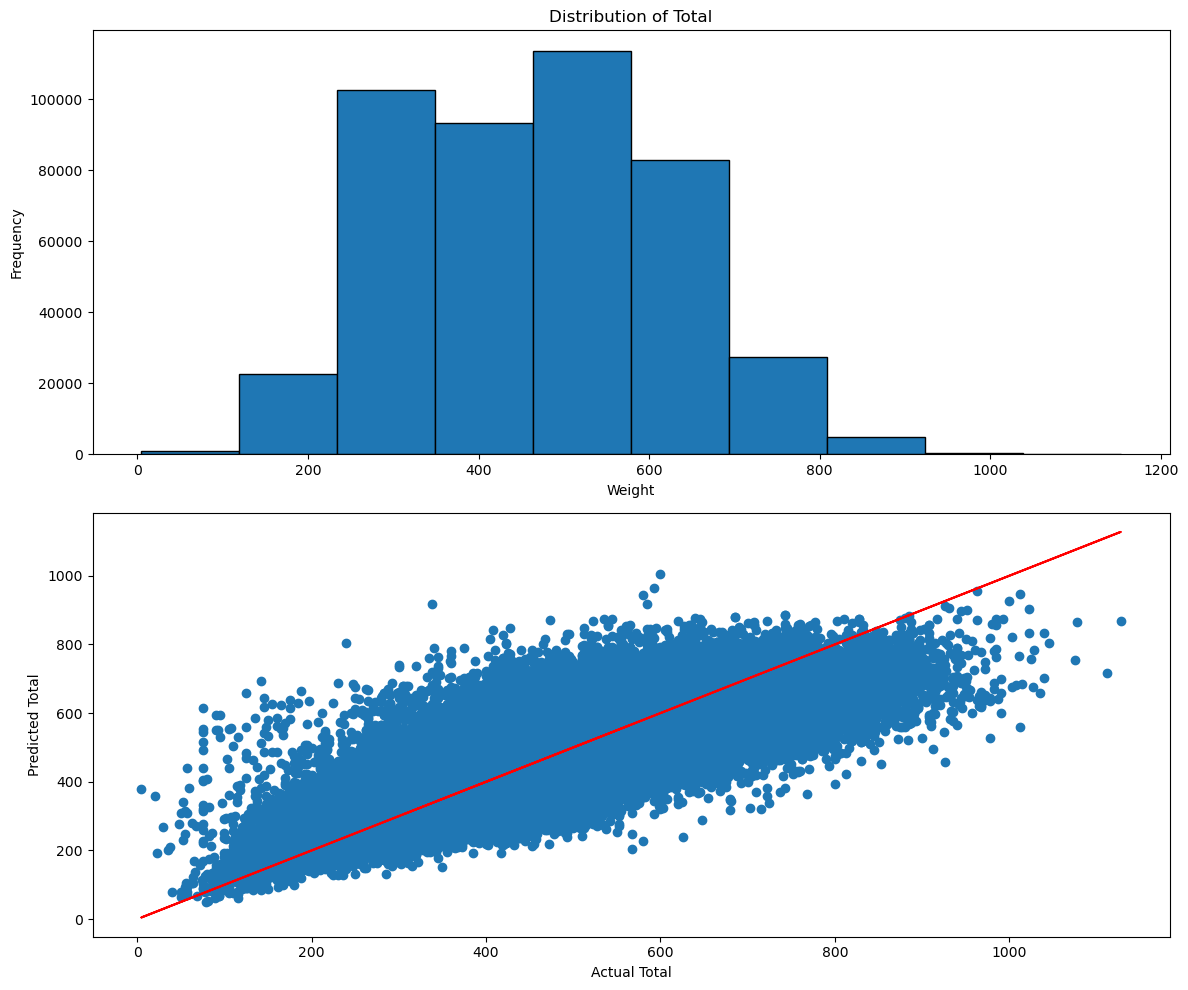

In [51]:
rf_model(total_g)

461271 rows.
5 columns.
4 features.
MSE: 1194.901026950335
RMSE: 34.567340466838566
RRMSE: 0.20783763809437536
MAE: 26.211824512703313
RMAE: 0.15759973498946908
EV: 0.647180666216707
R2: 0.6471772910302702


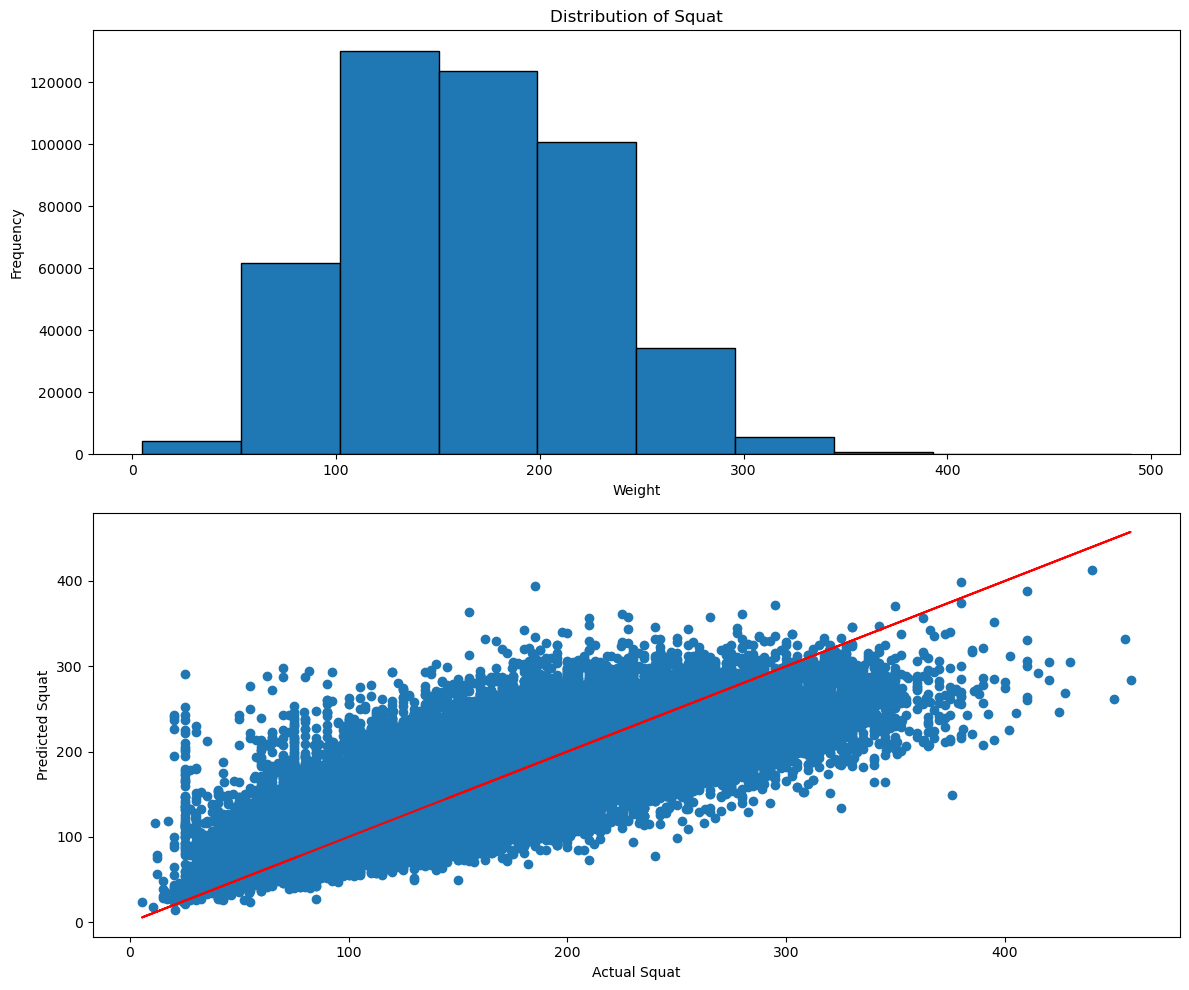

In [52]:
rf_model(squat_g)

626758 rows.
5 columns.
4 features.
MSE: 598.1388067322141
RMSE: 24.456876471295637
RRMSE: 0.21858586523640666
MAE: 18.225337791322186
RMAE: 0.1628908431956803
EV: 0.7140125000627828
R2: 0.7140121043547691


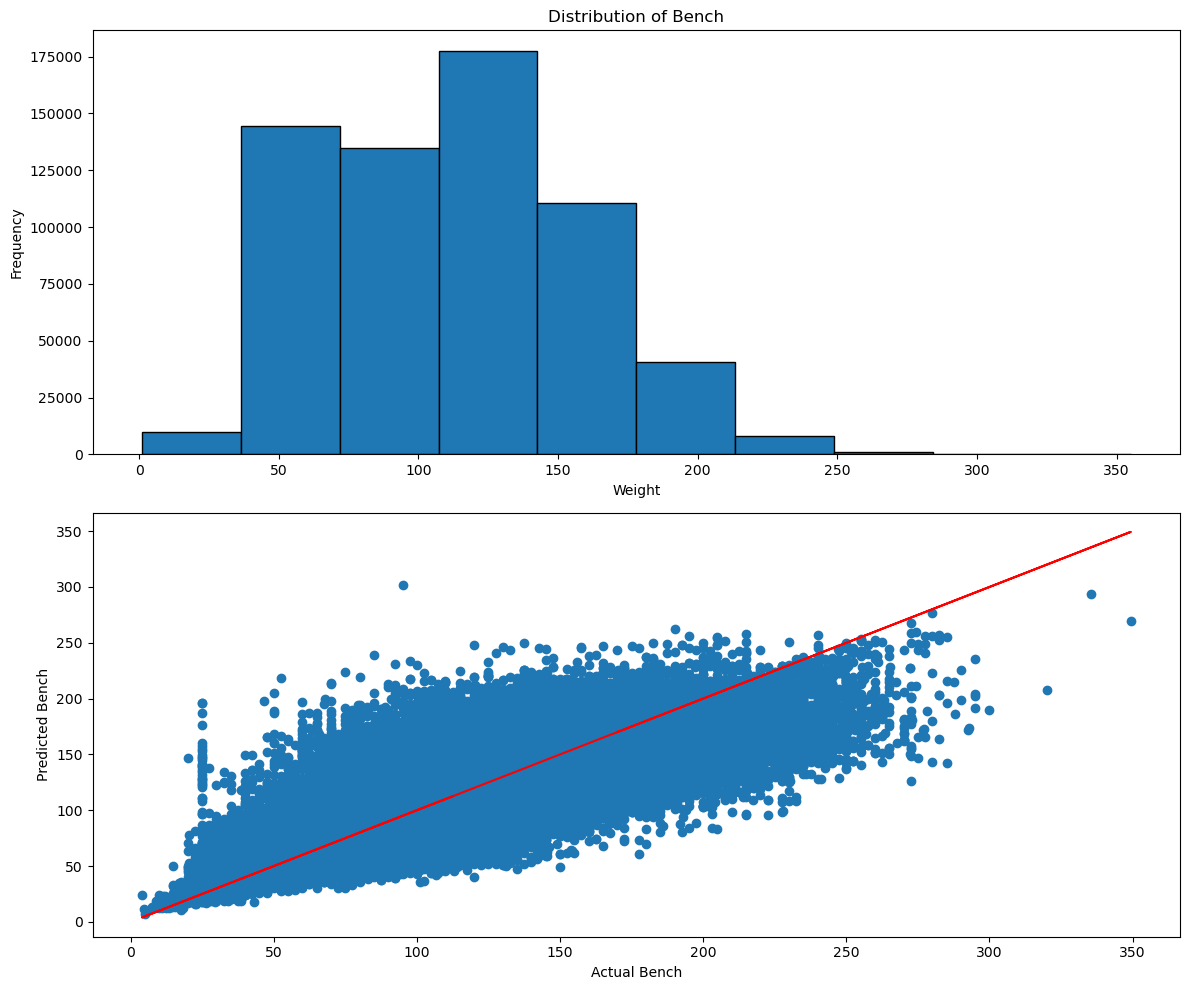

In [53]:
rf_model(bench_g)

541704 rows.
5 columns.
4 features.
MSE: 1227.3133836278473
RMSE: 35.03303274950439
RRMSE: 0.18147862196731607
MAE: 26.48042479275275
RMAE: 0.13717427876882582
EV: 0.6629382950590978
R2: 0.662934606038685


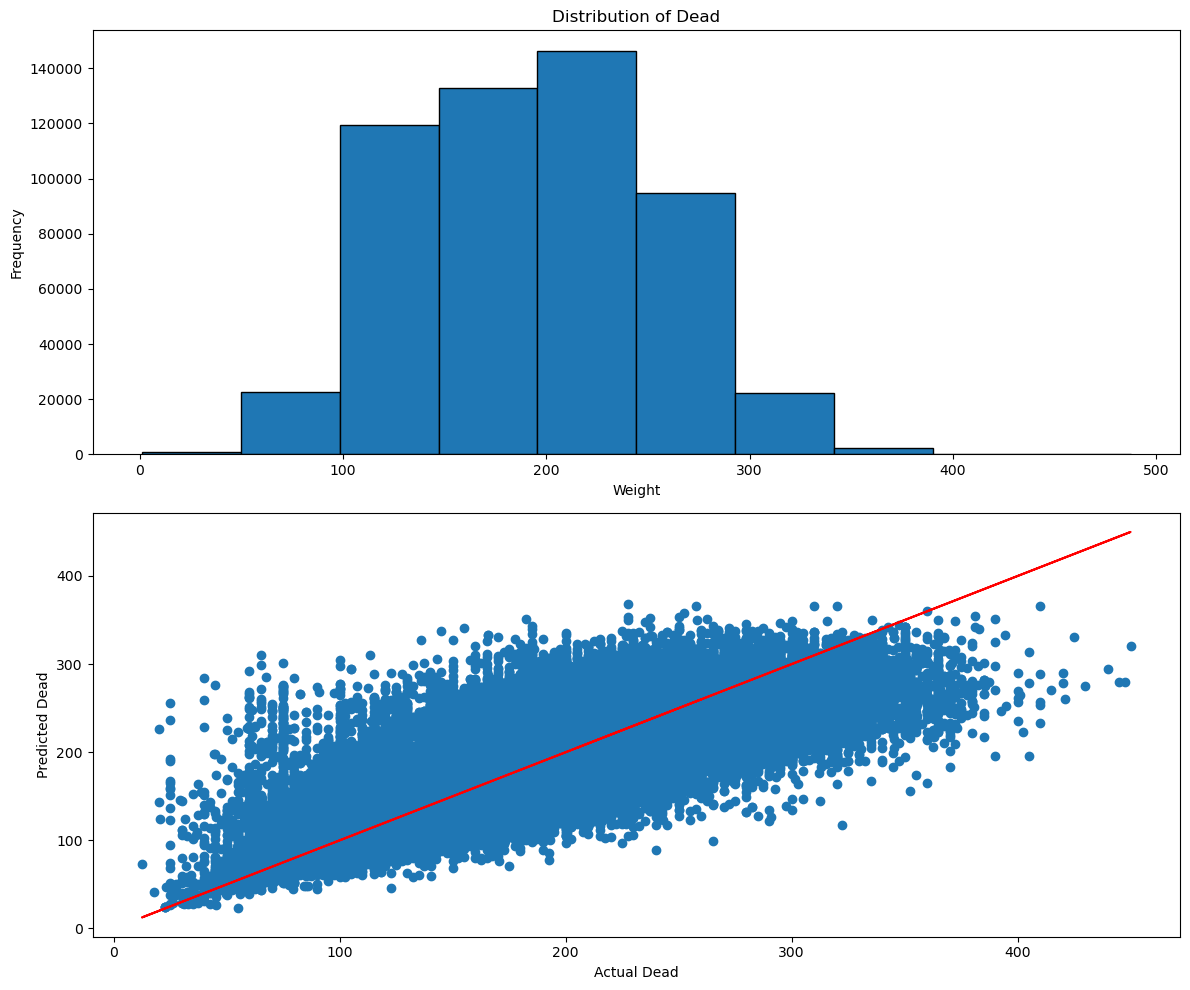

In [54]:
rf_model(dead_g)

# Top 10th Percentile per Weight Group

In [55]:
def weight(raw_df):
    weight = np.where(raw_df['Sex'] == 'F',
         np.where((raw_df['BodyweightKg']>0)&(raw_df['BodyweightKg']<=52),'Light',
                  np.where((raw_df['BodyweightKg']>52)&(raw_df['BodyweightKg']<=63),'Middle',
                           np.where((raw_df['BodyweightKg']>63)&(raw_df['BodyweightKg']<=84),'Heavy',
                                    np.where(raw_df['BodyweightKg']>84,'SuperHeavy','ERROR')))),
         np.where(raw_df['Sex'] == 'M',
                  np.where((raw_df['BodyweightKg']>0)&(raw_df['BodyweightKg']<=66),'Light',
                  np.where((raw_df['BodyweightKg']>66)&(raw_df['BodyweightKg']<=83),'Middle',
                           np.where((raw_df['BodyweightKg']>83)&(raw_df['BodyweightKg']<=105),'Heavy',
                                    np.where(raw_df['BodyweightKg']>105,'SuperHeavy','ERROR')))),'NA'))
    return weight

In [57]:
total['Weight'] = weight(total)
squat['Weight'] = weight(squat)
bench['Weight'] = weight(bench)
dead['Weight'] = weight(dead)

In [58]:
def max_strength_df(total, sex):
    summary = pd.DataFrame()
    col = total.columns[3]
    cutoff = total[total['Sex'] == sex].groupby('Weight')[col].quantile(.9).reset_index().copy()
    for x in range(len(cutoff)):
        weight = cutoff.iloc[x,0]
        strength = cutoff.iloc[x,1]
        df = total[total['Sex'] == sex][(total[total['Sex'] == sex]['Weight']==weight)&(total[total['Sex'] == sex][col]>=strength)].copy()
        summary = pd.concat([summary, df], axis = 0, ignore_index = True)
    return summary

In [66]:
total_t = pd.get_dummies(pd.concat([max_strength_df(total,'M'),max_strength_df(total,'F')], axis = 0, ignore_index = True)
                         ,columns = ['Tested','Sex'], drop_first = True).drop('Weight', axis = 1)
squat_t = pd.get_dummies(pd.concat([max_strength_df(squat,'M'),max_strength_df(squat,'F')], axis = 0, ignore_index = True)
                         ,columns = ['Tested','Sex'], drop_first = True).drop('Weight', axis = 1)
bench_t = pd.get_dummies(pd.concat([max_strength_df(bench,'M'),max_strength_df(bench,'F')], axis = 0, ignore_index = True)
                         ,columns = ['Tested','Sex'], drop_first = True).drop('Weight', axis = 1)
dead_t = pd.get_dummies(pd.concat([max_strength_df(dead,'M'),max_strength_df(dead,'F')], axis = 0, ignore_index = True)
                        ,columns = ['Tested','Sex'], drop_first = True).drop('Weight', axis = 1)

Linear Regression

45868 rows.
5 columns.
4 features.
MSE: 2560.1785271983713
RMSE: 50.59820675872191
RRMSE: 0.08138664745122676
MAE: 38.01626044106285
RMAE: 0.06114872807023871
EV: 0.8966491319369774
R2: 0.8966384509324135


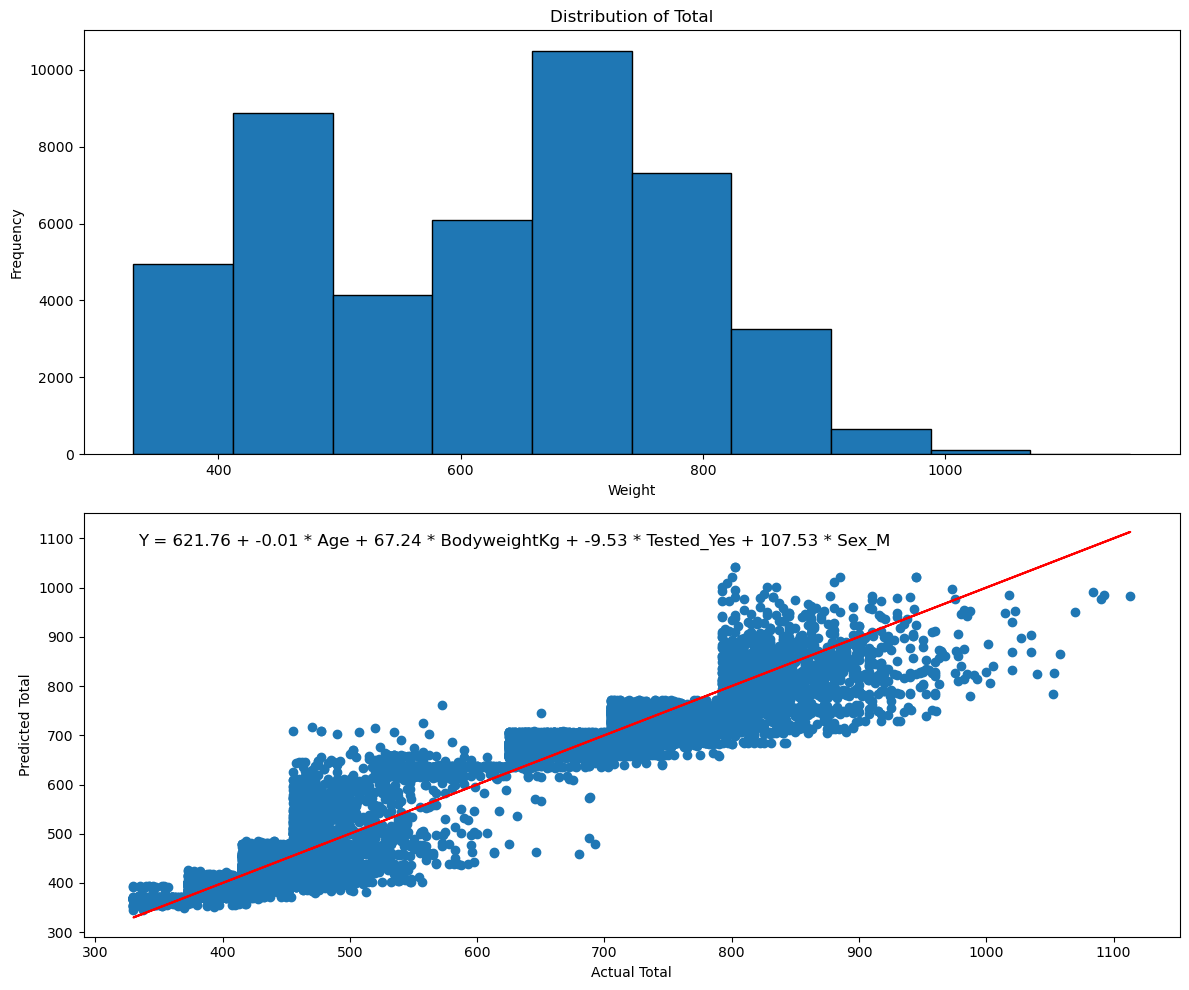

In [67]:
lr_model(total_t)

48290 rows.
5 columns.
4 features.
MSE: 428.1846755743869
RMSE: 20.69262369962753
RRMSE: 0.08989045077856922
MAE: 15.328378274306786
RMAE: 0.06658772965589017
EV: 0.8762350634465579
R2: 0.8762210276503086


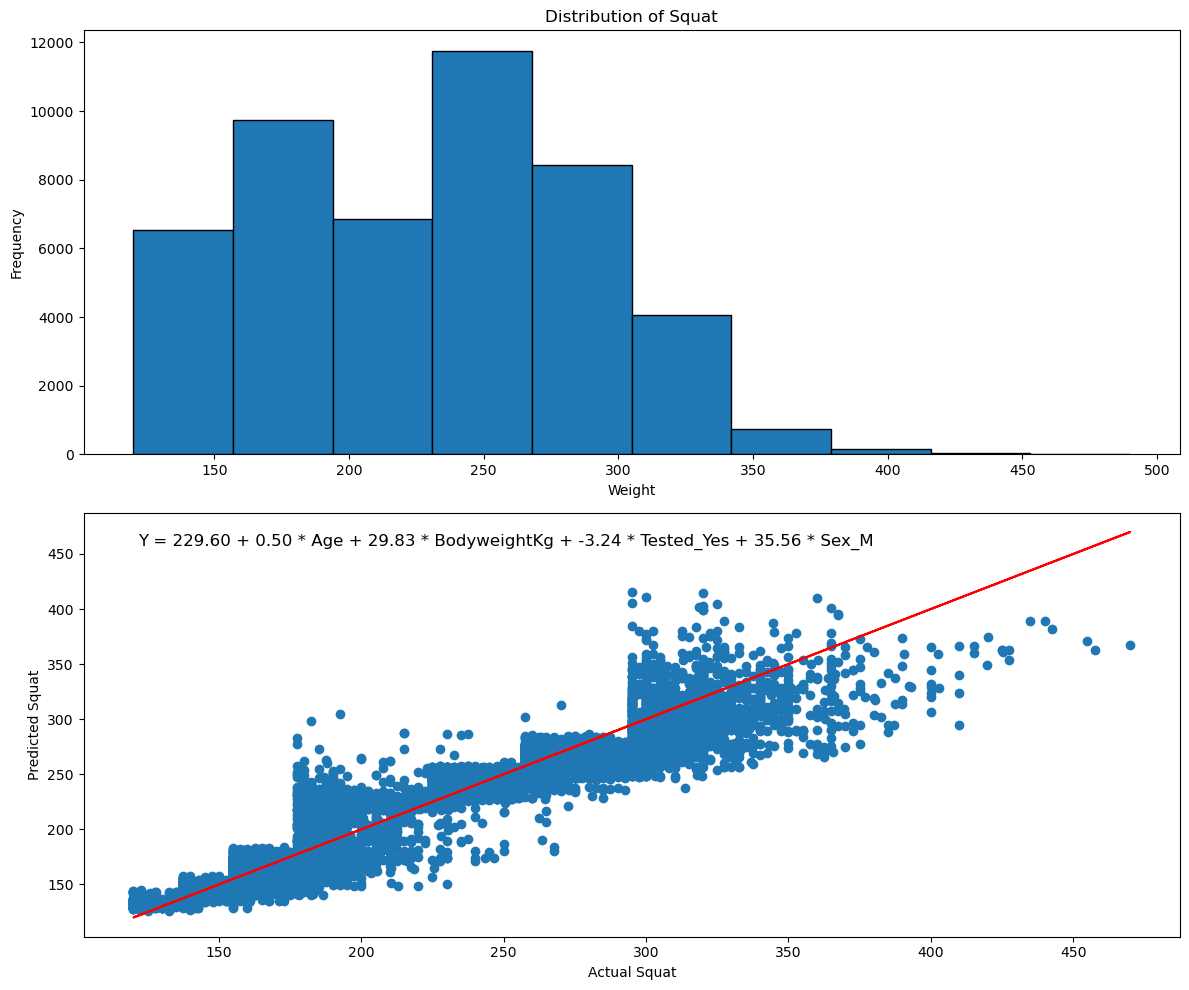

In [68]:
lr_model(squat_t)

68654 rows.
5 columns.
4 features.
MSE: 294.3527579709757
RMSE: 17.1567117470387
RRMSE: 0.10823433770162154
MAE: 12.823062350811457
RMAE: 0.08089520190757014
EV: 0.8756062456196378
R2: 0.8756021260505791


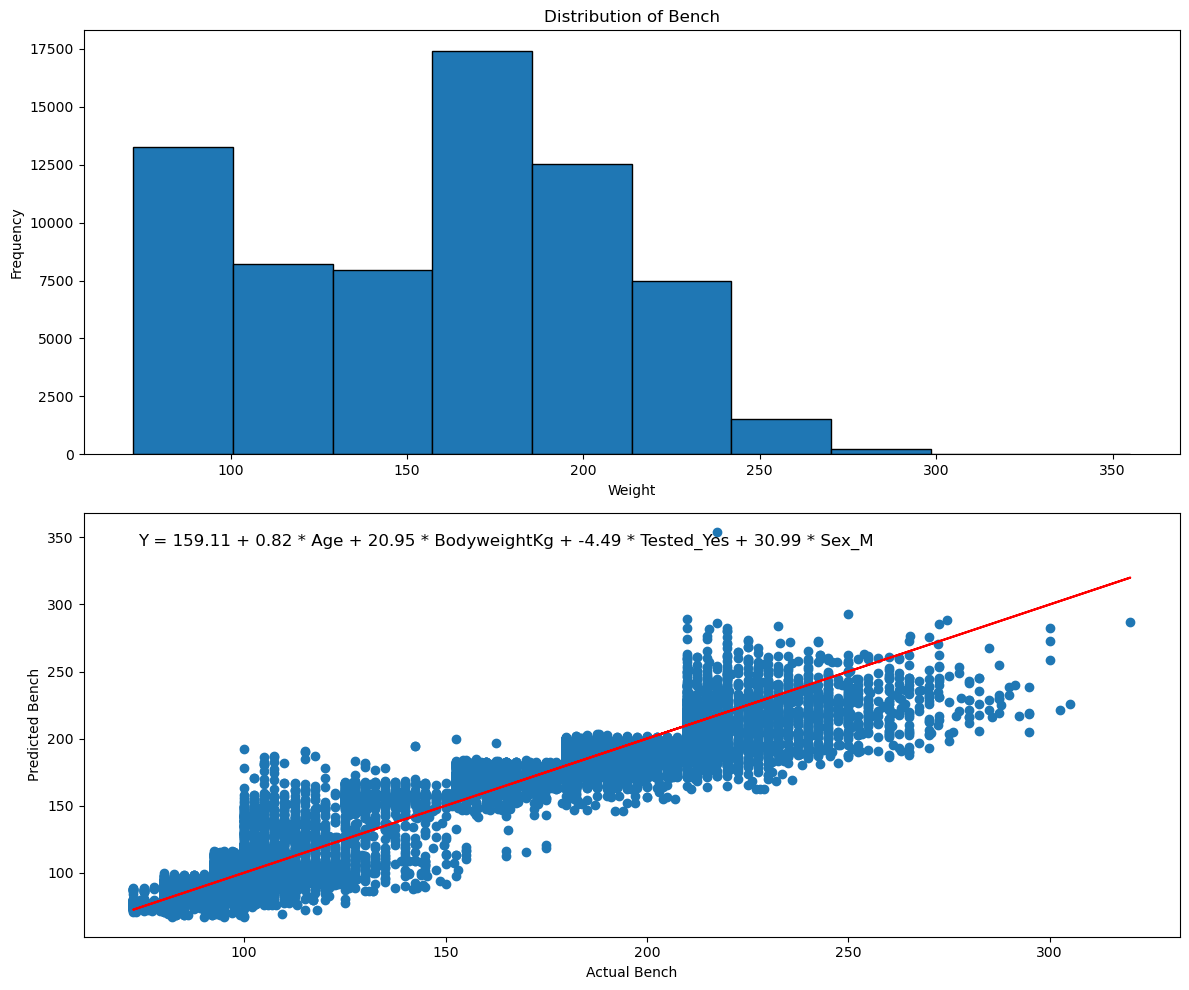

In [69]:
lr_model(bench_t)

57810 rows.
5 columns.
4 features.
MSE: 406.0578931130596
RMSE: 20.150878221880543
RRMSE: 0.07874257473971343
MAE: 14.938448084994455
RMAE: 0.058374223290712214
EV: 0.8869528535155592
R2: 0.886944930624991


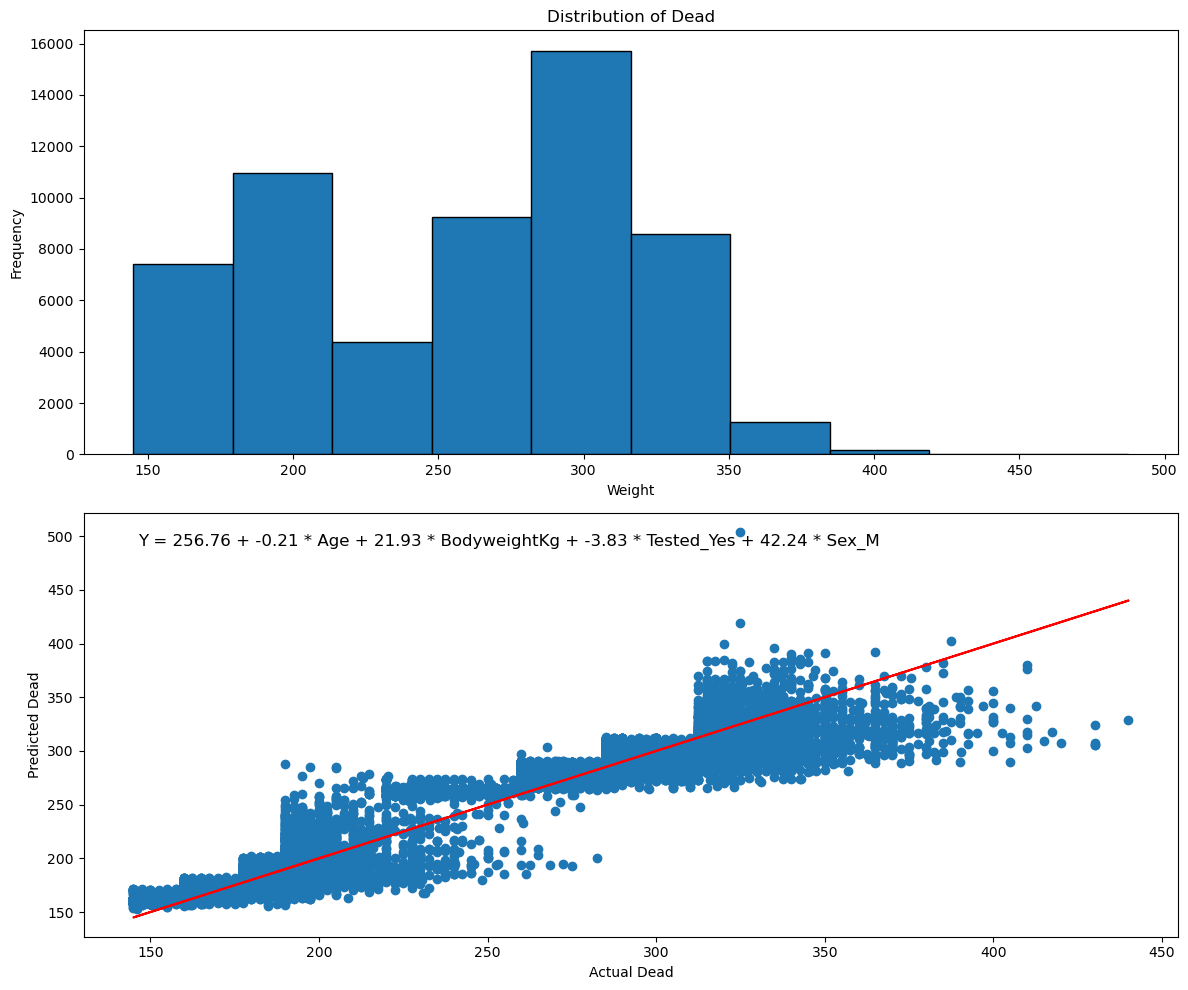

In [70]:
lr_model(dead_t)

Random Forest

45868 rows.
5 columns.
4 features.
MSE: 1646.8046272501806
RMSE: 40.58084064247783
RRMSE: 0.0652738265289302
MAE: 30.071769064009562
RMAE: 0.0483701028915491
EV: 0.9335591524736092
R2: 0.9335139032391943


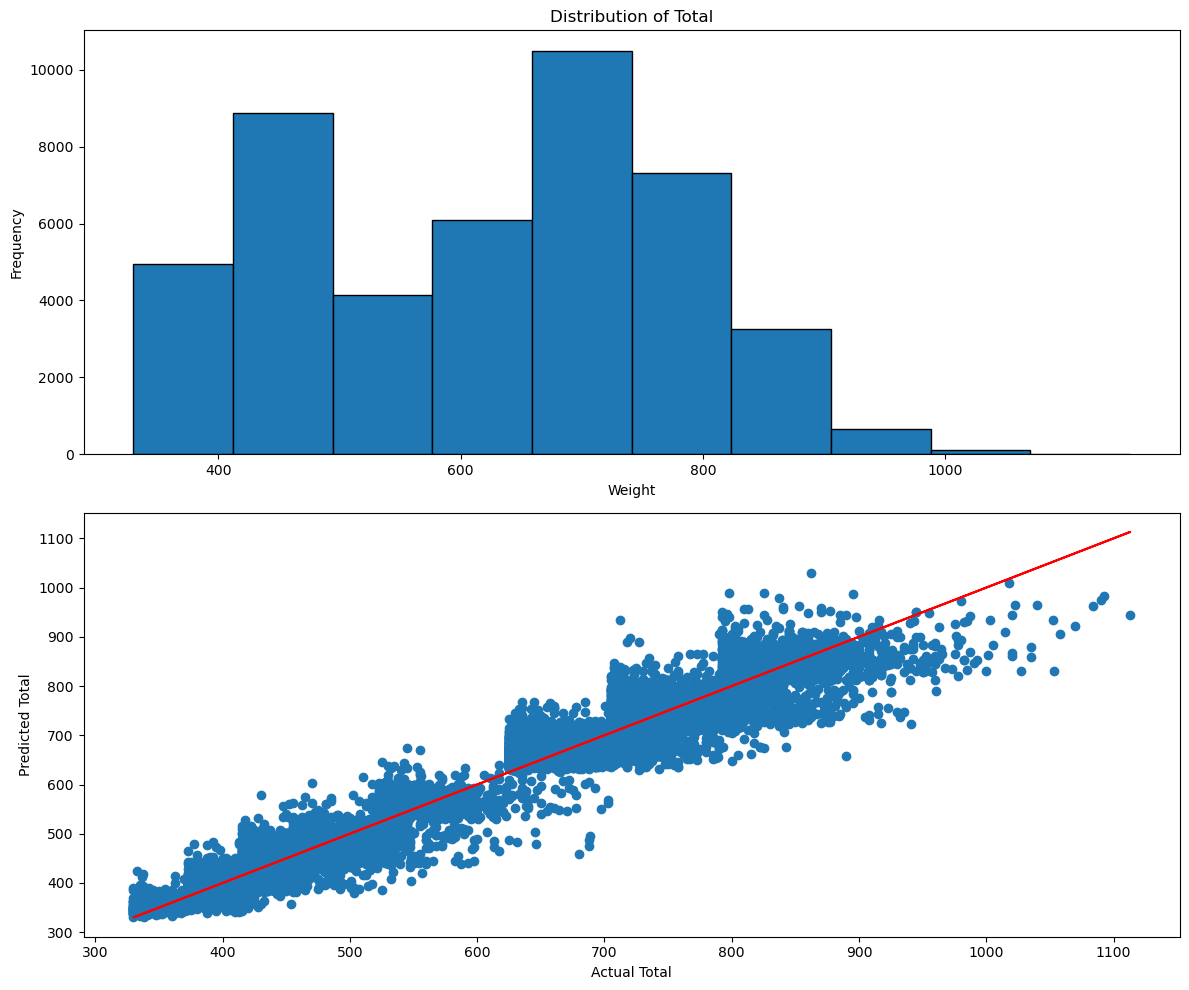

In [71]:
rf_model(total_t)

48290 rows.
5 columns.
4 features.
MSE: 293.03308164210944
RMSE: 17.118209066433014
RRMSE: 0.07436290109171377
MAE: 12.303548327599053
RMAE: 0.05344762082363185
EV: 0.9152928497100838
R2: 0.9152904441022616


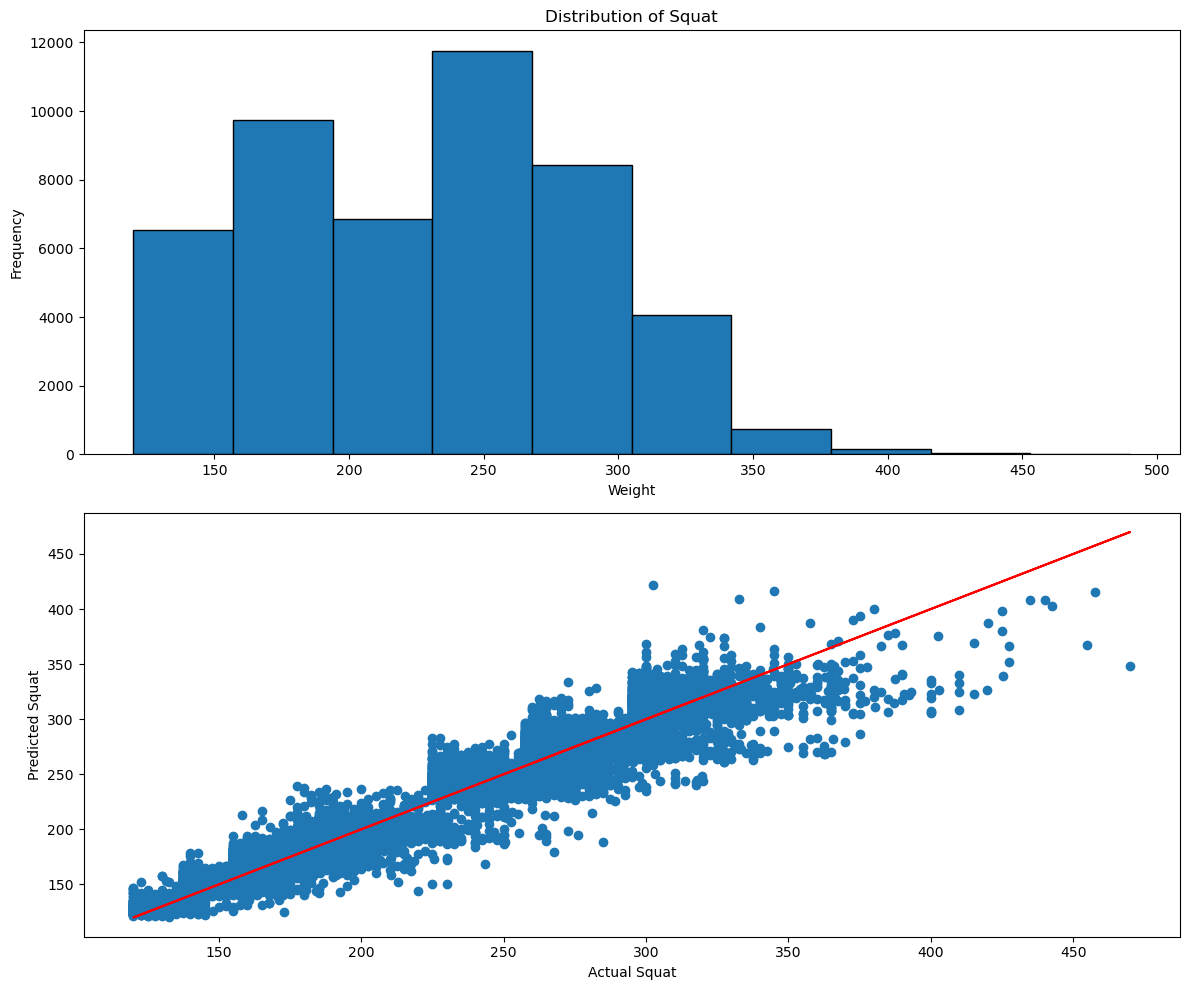

In [72]:
rf_model(squat_t)

68654 rows.
5 columns.
4 features.
MSE: 187.6789198311913
RMSE: 13.69959560830871
RRMSE: 0.0864248743761325
MAE: 9.772428419145893
RMAE: 0.06165006052895448
EV: 0.9207278454405596
R2: 0.9206840840457622


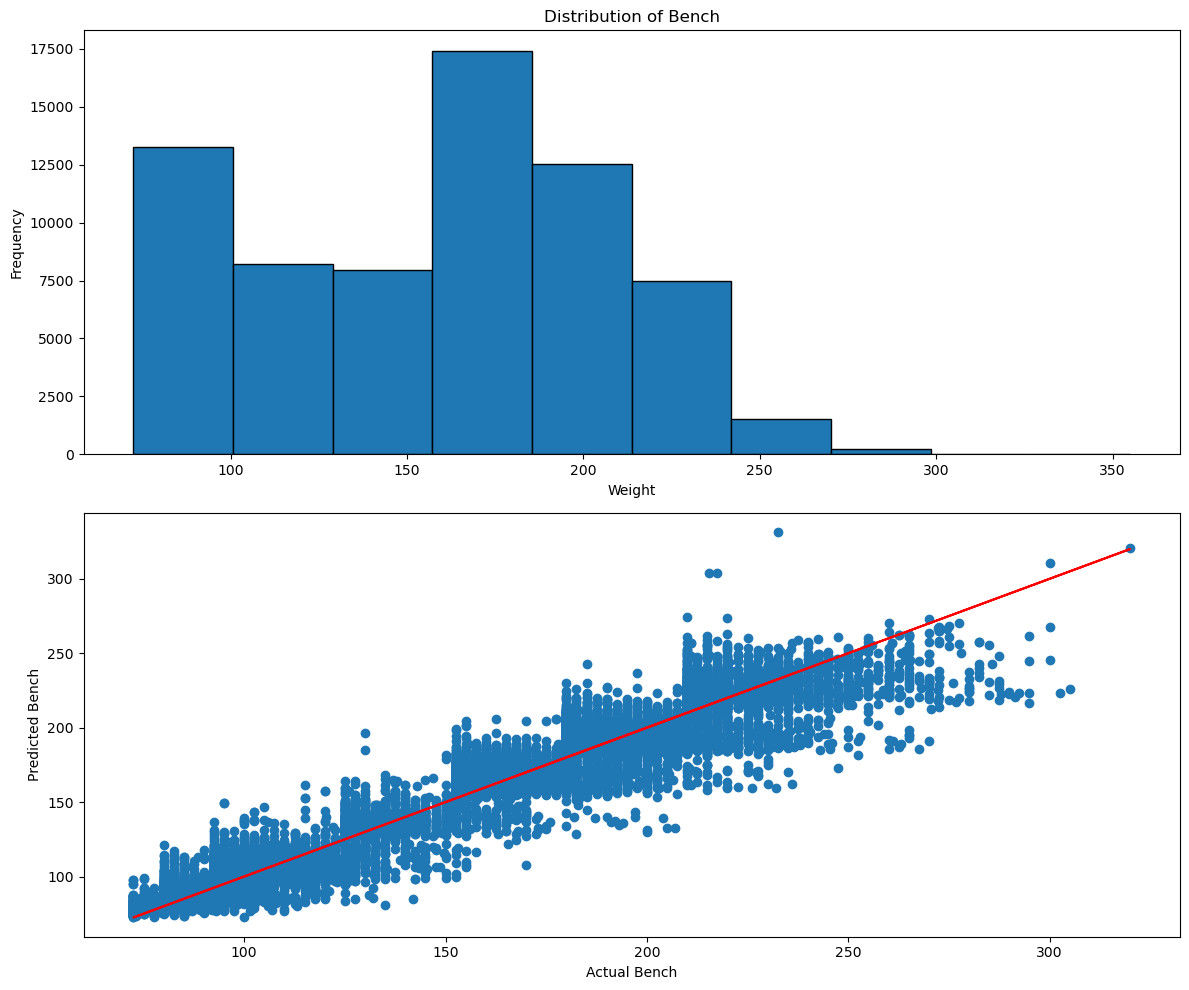

In [73]:
rf_model(bench_t)

57810 rows.
5 columns.
4 features.
MSE: 289.5697567651207
RMSE: 17.016749300766016
RRMSE: 0.06649549656786555
MAE: 12.200599178688035
RMAE: 0.04767566862936819
EV: 0.9194426017162449
R2: 0.9193776811257057


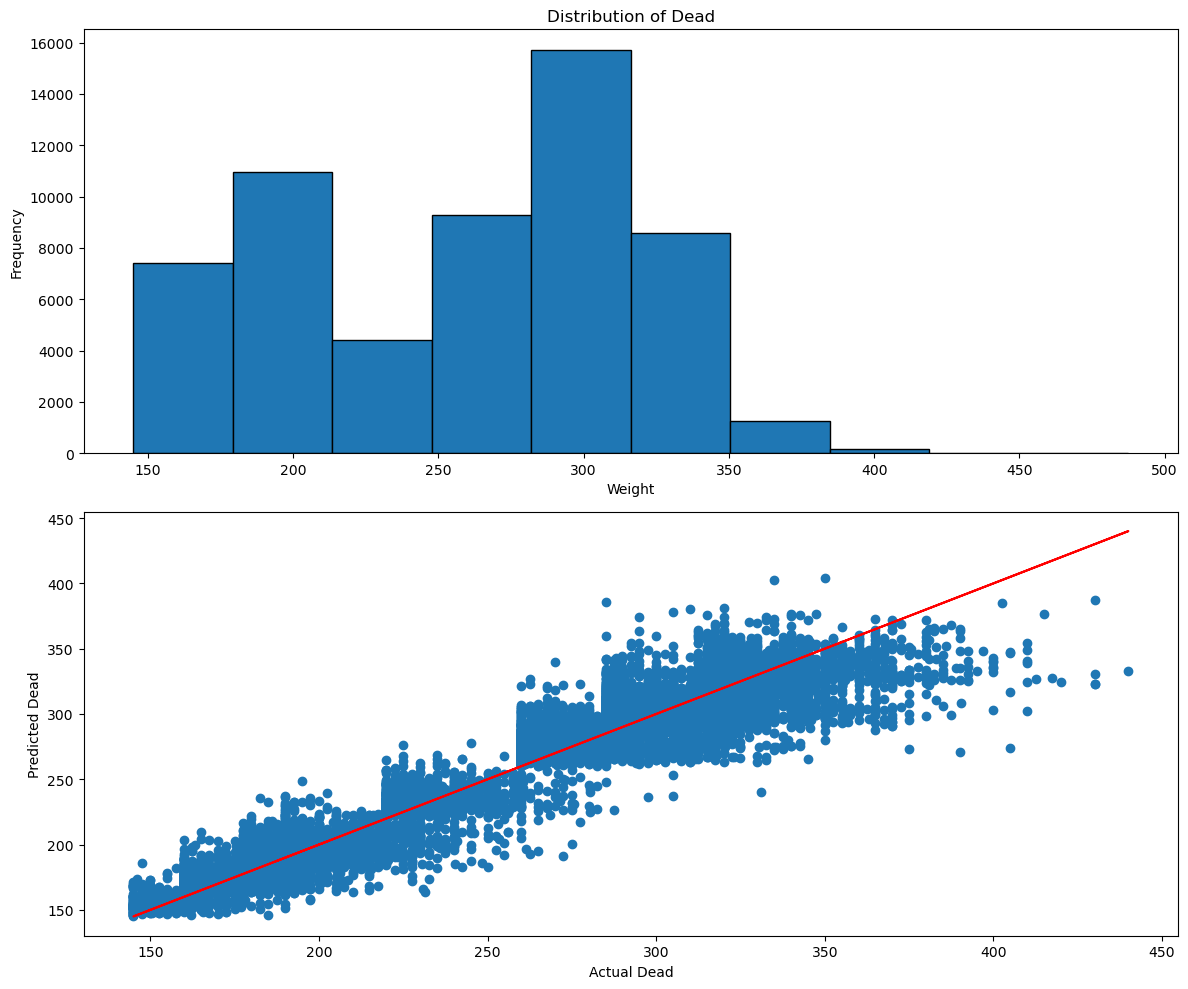

In [74]:
rf_model(dead_t)